## K Means Clustering Algorithm
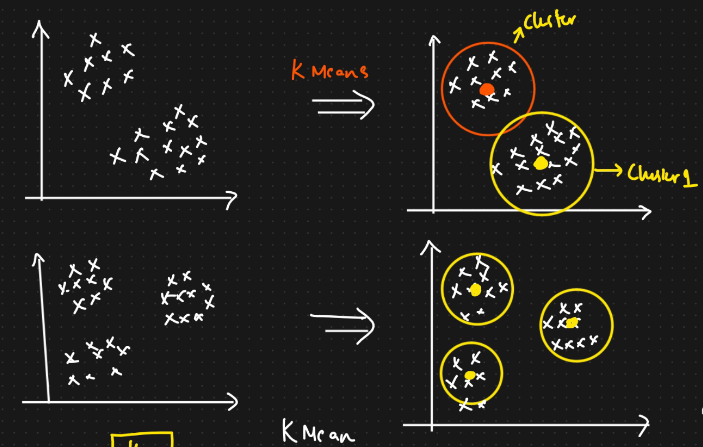

- After applying the K means clustering on dataset, will be getting different clusters with each cluster having "Centroids"
- Cluster the similar points together is the main aim behind K Means Clustering
- "Centroids basically means K value"

### How to create clusters
Steps:

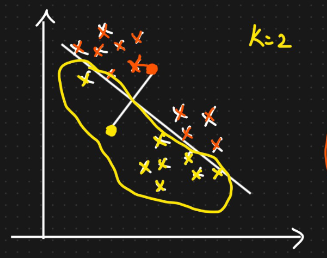

- Initialize some centroids means K value randomly
- Find out the distance of all the points with the each centroids
    - to find out the distance will be using "Eucledian or Manganttan distance"
    - Whichever point is near to whichever centroids will become part of that centroid or group
- Move the centroids -> find out the average of all the points in each group and whatever the average will become the new centroid for that group
- Repeat the step2 again find out the group and agin move the cnetroid, repeat util there is no change in the group

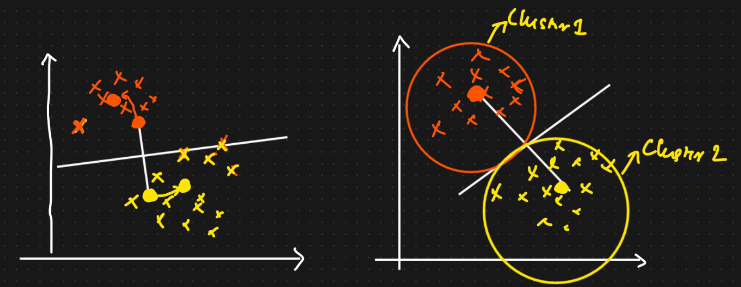